In [70]:
import pandas as pd
import keras
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from keras.models import load_model
import numpy as np
from io import BytesIO

import requests
from io import BytesIO
from sklearn.model_selection import train_test_split


In [71]:
data = pd.read_csv('comportamiento_completo.csv')
X = data[['X', 'Y', 'Z', 'Energy', 'Temp']]
y = data[['comportamiento']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

ParserError: Error tokenizing data. C error: Expected 2223 fields in line 10, saw 3676


In [68]:
#Entrada
entrada = keras.Input(shape=(5,))

x = keras.layers.Flatten()(entrada)
x = keras.layers.Dense(16, activation='sigmoid')(x)
x = keras.layers.Dense(16, activation='sigmoid')(x)
x = keras.layers.Dense(16, activation='sigmoid')(x)
x = keras.layers.Dense(16, activation='sigmoid')(x)
x = keras.layers.Dense(16, activation='sigmoid')(x)
x = keras.layers.Dense(16, activation='sigmoid')(x)
salida = keras.layers.Dense(1, activation='sigmoid')(x)
modelo3 = keras.Model(inputs = entrada, outputs = salida)

In [11]:
modelo3 = load_model('modelo_entrenado.h5')


In [69]:
modelo3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                loss='binary_crossentropy', 
                metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
modelo3.summary()
historial3 = modelo3.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,473 (5.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
54352/54352 ━━━━━━━━━━━━━━━━━━━━ 82s 1ms/step - AUC: 0.6067 - Precision: 0.6211 - Recall: 0.5276 - accuracy: 0.5847 - loss: 0.6714 - val_AUC: 0.5000 - val_Precision: 0.5179 - val_Recall: 1.0000 - val_accuracy: 0.5179 - val_loss: 0.6926
Epoch 2/30
54352/54352 ━━━━━━━━━━━━━━━━━━━━ 92s 2ms/step - AUC: 0.4994 - Precision: 0.5170 - Recall: 0.8274 - accuracy: 0.5112 - loss: 0.6932 - val_AUC: 0.5000 - val_Precision: 0.5179 - val_Recall: 1.0000 - val_accuracy: 0.5179 - val_loss: 0.6929
Epoch 3/30
54352/54352 ━━━━━━━━━━━━━━━━━━━━ 90s 2ms/step - AUC: 0.4998 - Precision: 0.5173 - Recall: 0.8532 - accuracy: 0.5122 - loss: 0.6932 - val_AUC: 0.5000 - val_Precision: 0.5179 - val_Recall: 1.0000 - val_accuracy: 0.5179 - val_loss: 0.6926
Epoch 4/30
54352/54352 ━━━━━━━━━━━━━━━━━━━━ 90s 2ms/step - AUC: 0.5002 - Precision: 0.5171 - Recall: 0.8352 - accuracy: 0.5114 - loss: 0.6932 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4821 - val_loss: 0.6953
Epoc

In [22]:
modelo3.save('modelo_entrenado.h5')

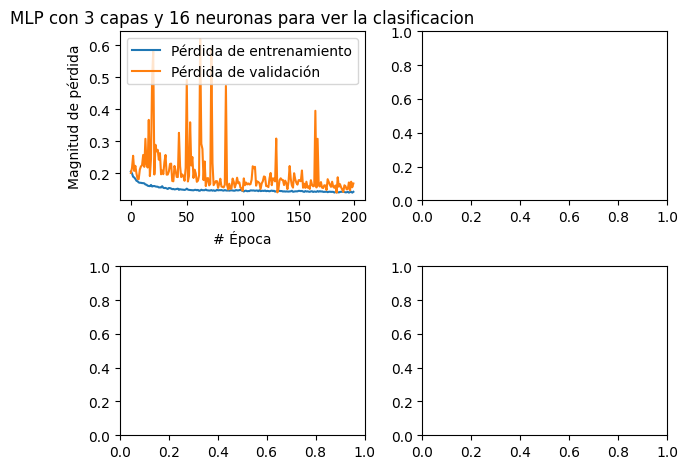

In [23]:
#MLP con 4 capas y varias neuronas
loss3 = historial3.history['loss']
val_loss3 = historial3.history['val_loss']

# Graficar la pérdida de entrenamiento y validación
fig, axs = plt.subplots(2, 2)
axs[0][0].set_title('MLP con 3 capas y 16 neuronas para ver la clasificacion')
axs[0][0].set_xlabel("# Época")
axs[0][0].set_ylabel("Magnitud de pérdida")
axs[0][0].plot(loss3, label='Pérdida de entrenamiento')
axs[0][0].plot(val_loss3, label='Pérdida de validación')
axs[0][0].legend()

fig.tight_layout()
plt.show()

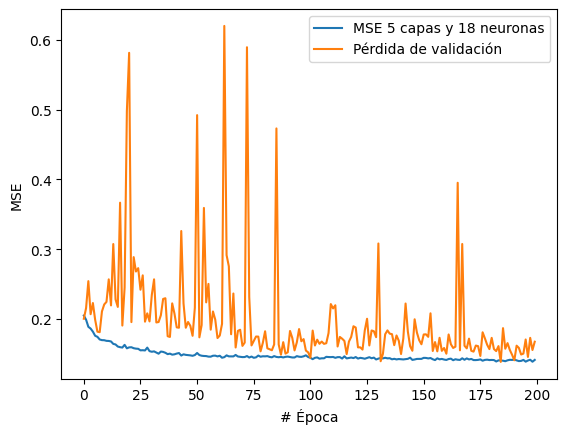

In [24]:
#MLP con 4 capas y varias neuronas
mse3 = historial3.history['mean_squared_error']

plt.xlabel("# Época")
plt.ylabel("MSE")
plt.plot(mse3, label='MSE 5 capas y 18 neuronas')
plt.plot(historial3.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.show()